In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
# Change this to the path where this folder is located in your Drive
os.chdir('/content/drive/My Drive/masterarbeit/xgboost')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

## Input and Output variable names

In [3]:
IN_VAR_NAMES  = ['ID', 'Reinforcing Layer', 'Material Model Nr.', 'CMM Usermat Model', 'Reinforcement Area',
                'Reinforcement Diameter','Effective Reinforcement TCM','Yield Stress Reinforcement',
                'Ultimate Stress Reinforcement','Ultimate Strain Reinforcement','Reinforcement Angle',
                'Concrete Compression Strength','Ultimate Strain Concrete','Normal Strain X',
                'Normal Strain Y','Shear Strain XY']

OUT_VAR_NAMES = ['ID', 'Normal Stress in X-Direction $\sigma_x$', 'Normal Stress in Y-Direction $\sigma_y$',
                'Normal Stress in XY-Direction $\sigma_{xy}$', 'Stiffness Tensor Component $K_{11}$',
                'Stiffness Tensor Component $K_{12}$', 'Stiffness Tensor Component $K_{13}$',
                'Stiffness Tensor Component $K_{21}$', 'Stiffness Tensor Component $K_{22}$', 
                'Stiffness Tensor Component $K_{23}$', 'Stiffness Tensor Component $K_{31}$',
                'Stiffness Tensor Component $K_{32}$', 'Stiffness Tensor Component $K_{33}$']

## Load pre-splitted training, validation and test sets

In [5]:
X_train, X_val, X_test = np.load('data/X_train.npy', allow_pickle=True), np.load('data/X_val.npy', allow_pickle=True), np.load('data/X_test.npy', allow_pickle=True)
y_train, y_val, y_test = np.load('data/y_train.npy', allow_pickle=True), np.load('data/y_val.npy', allow_pickle=True), np.load('data/y_test.npy', allow_pickle=True)

## Create histograms for input variables

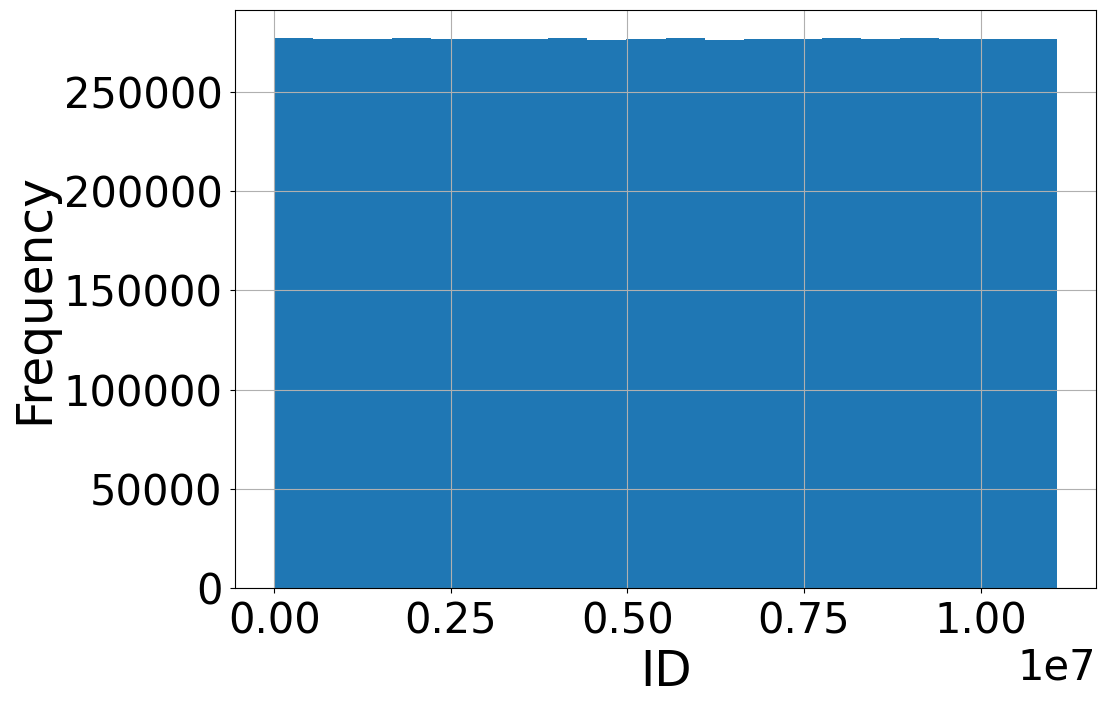

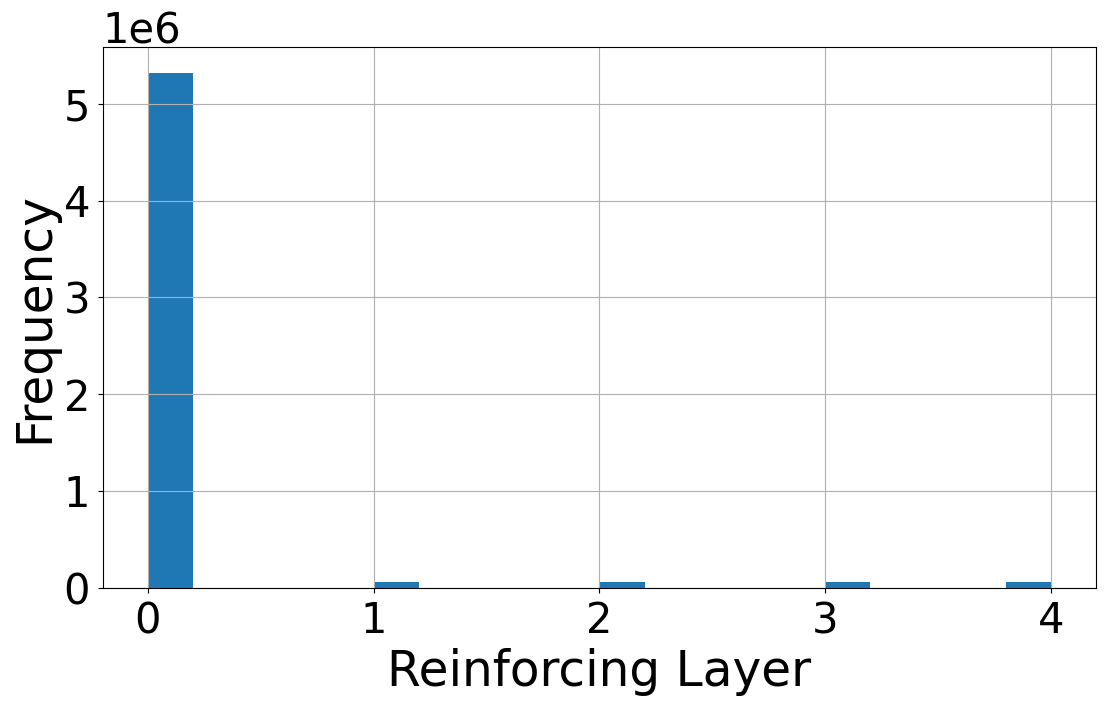

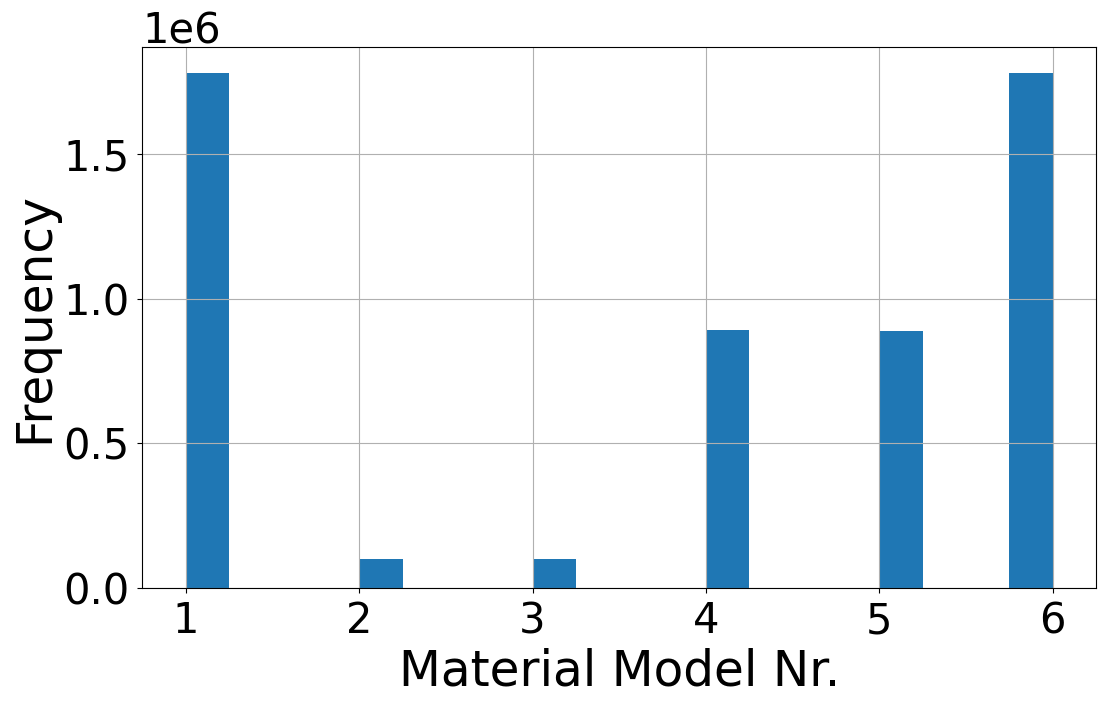

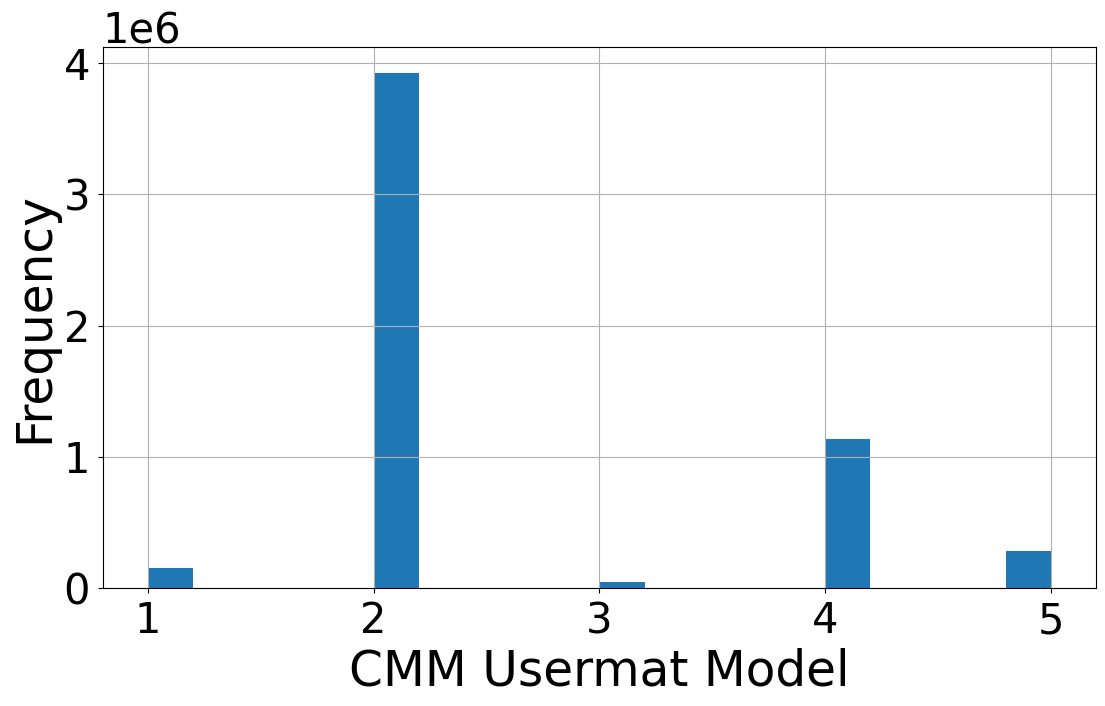

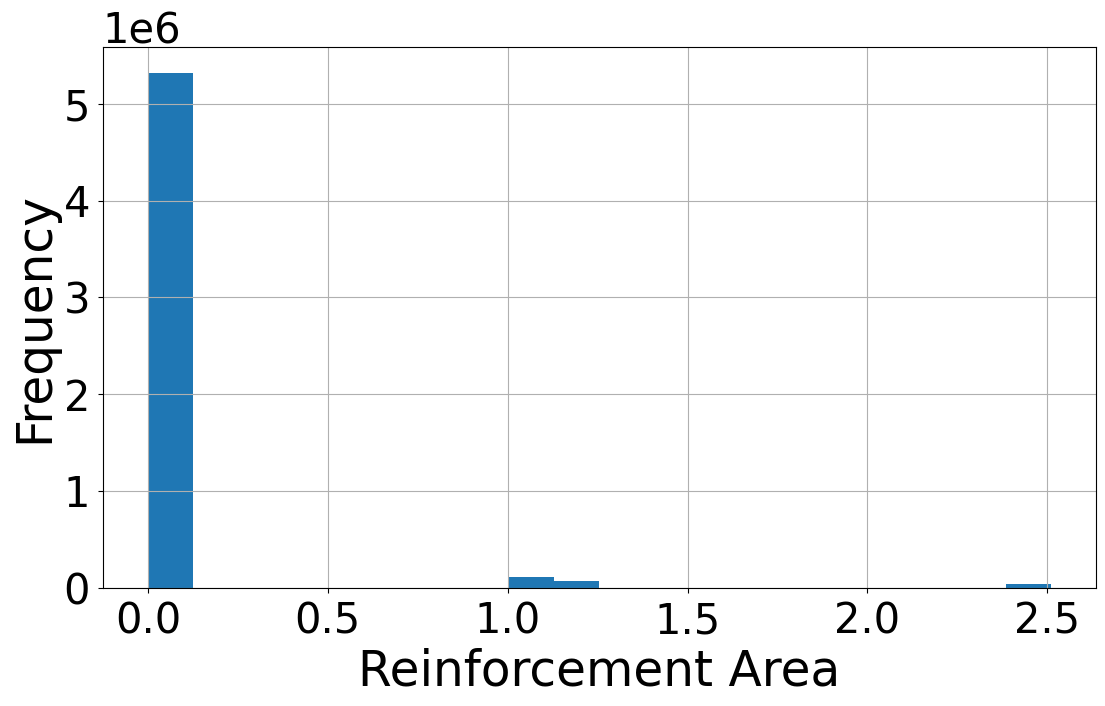

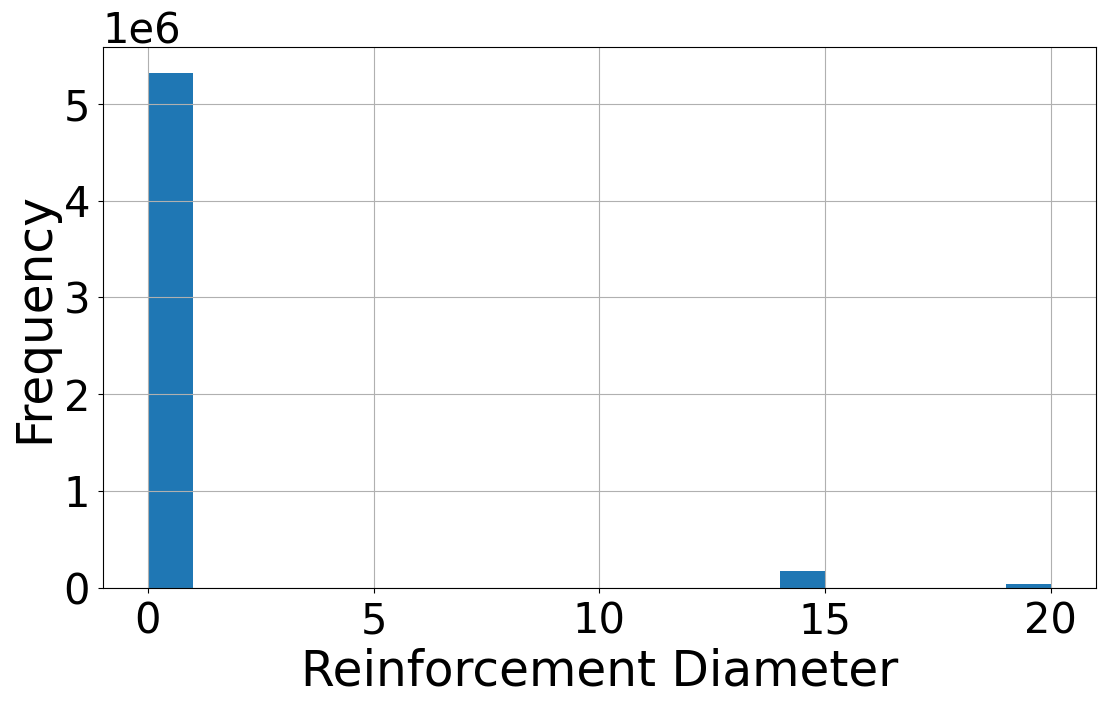

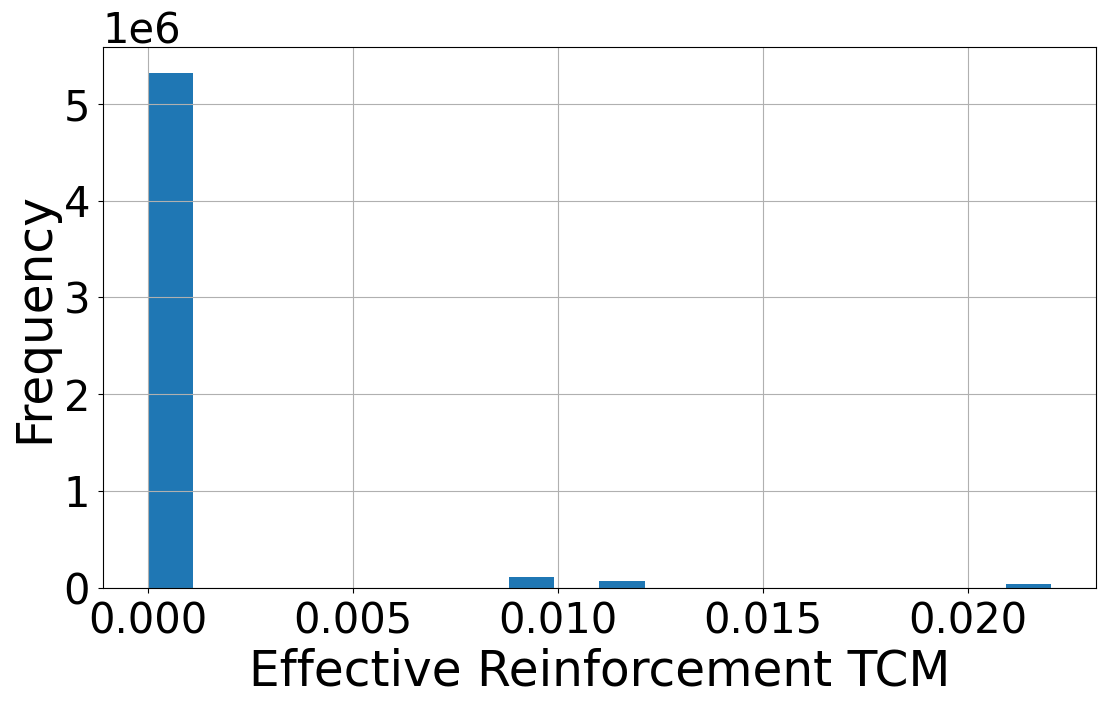

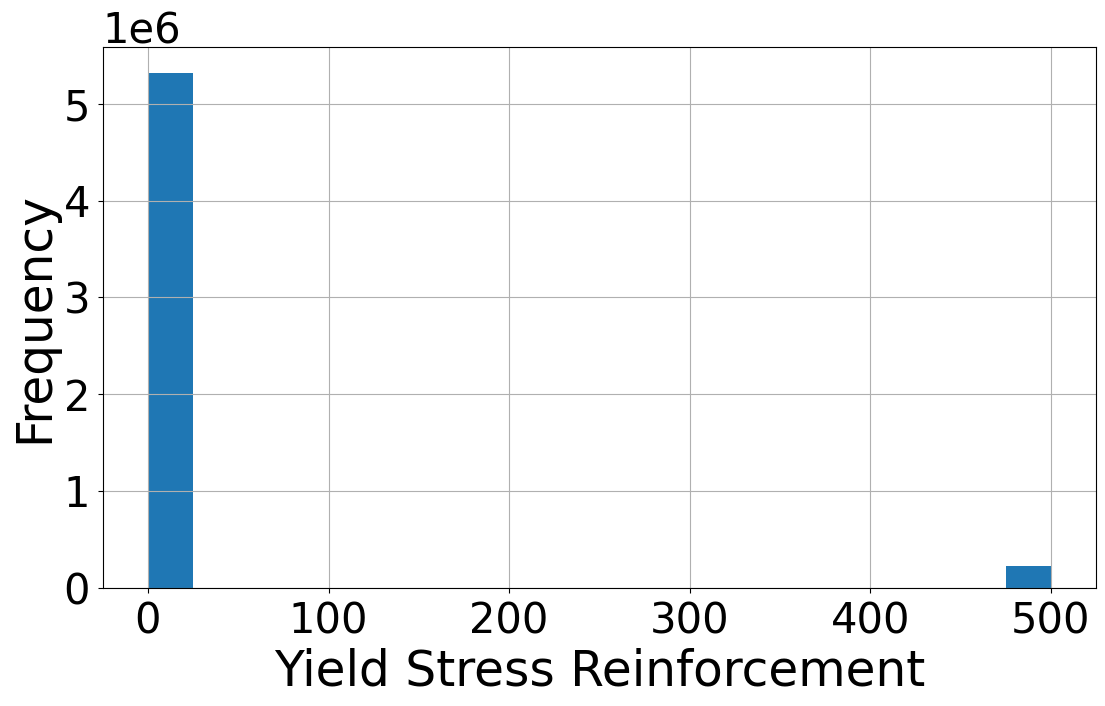

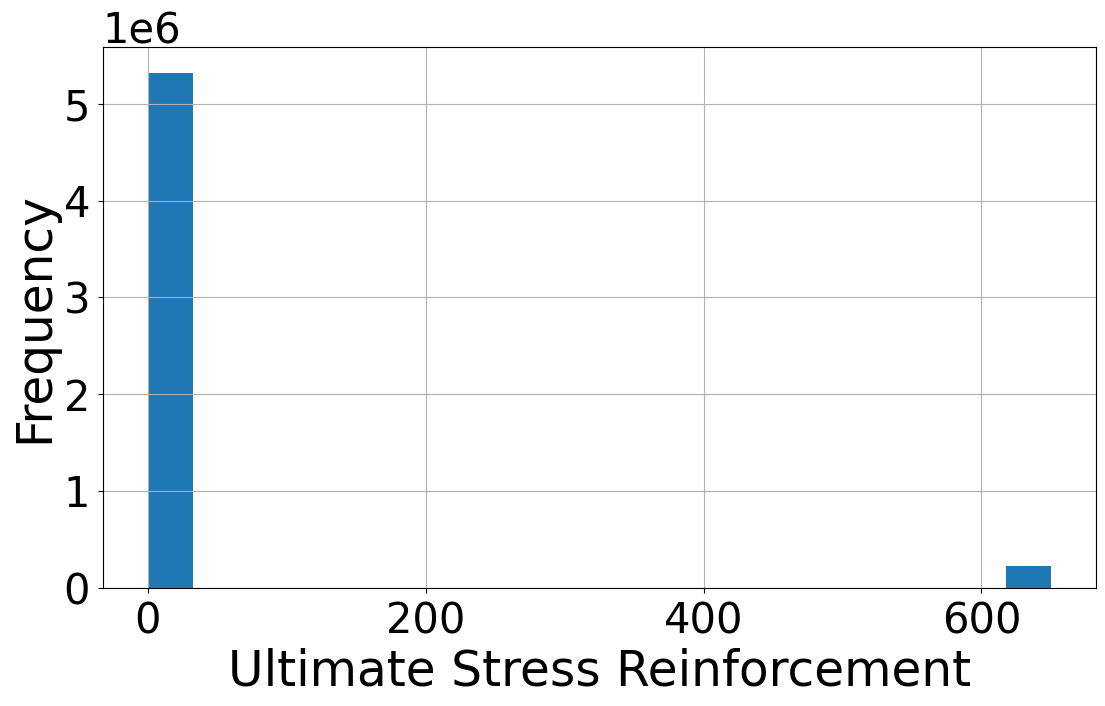

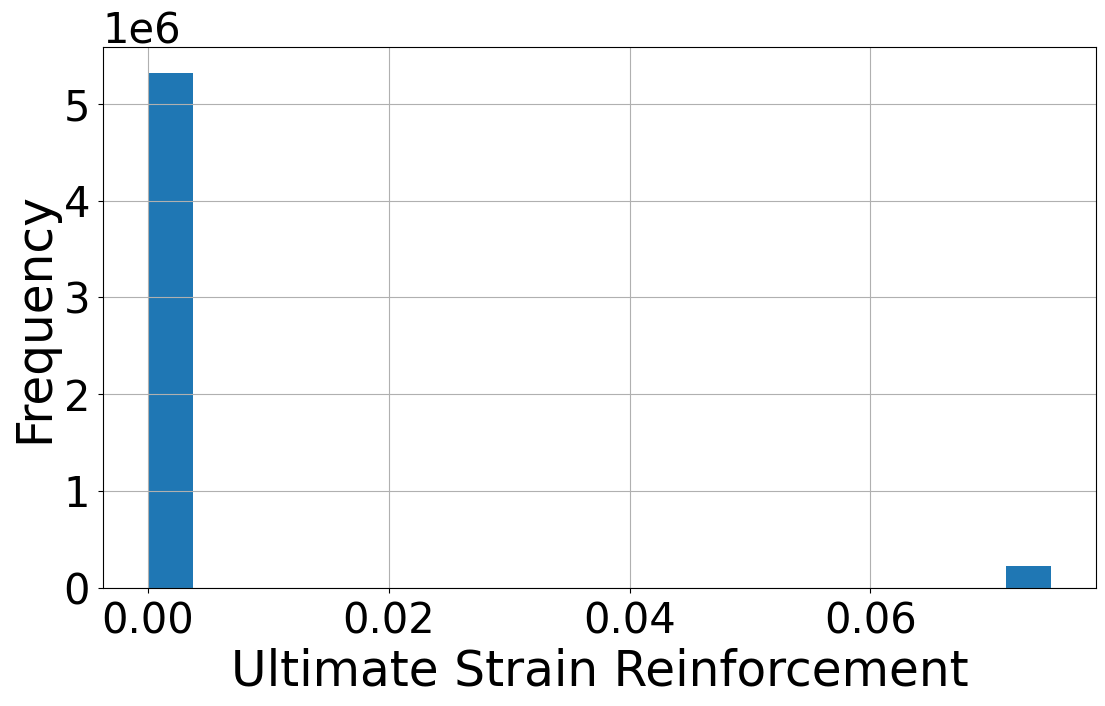

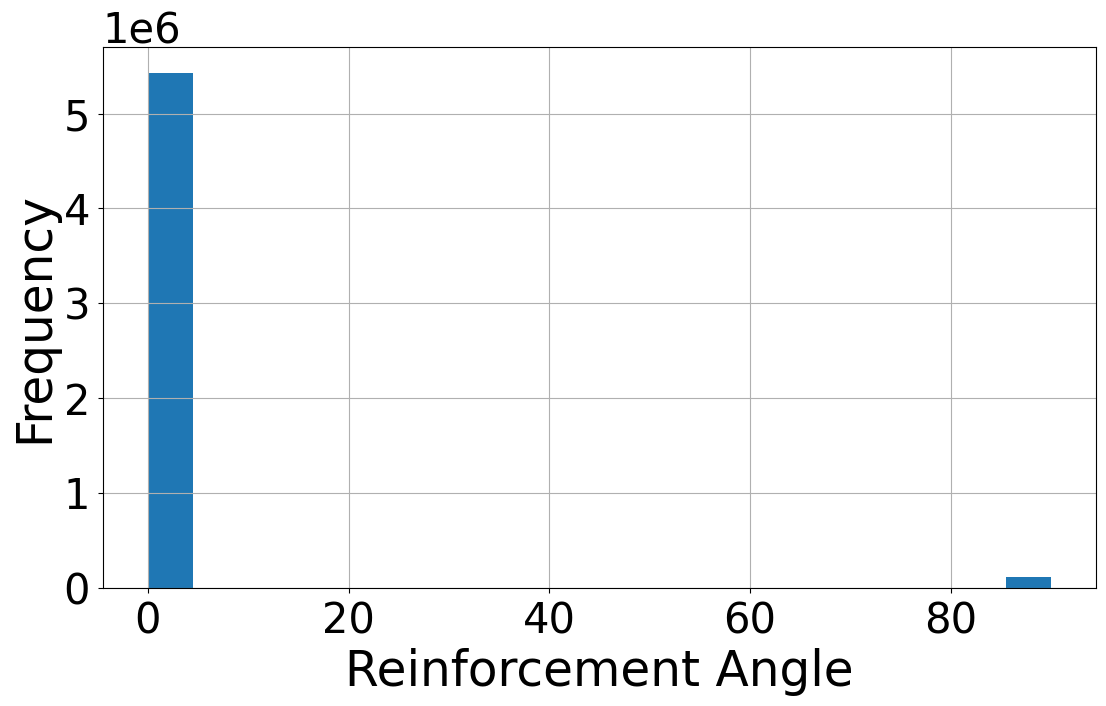

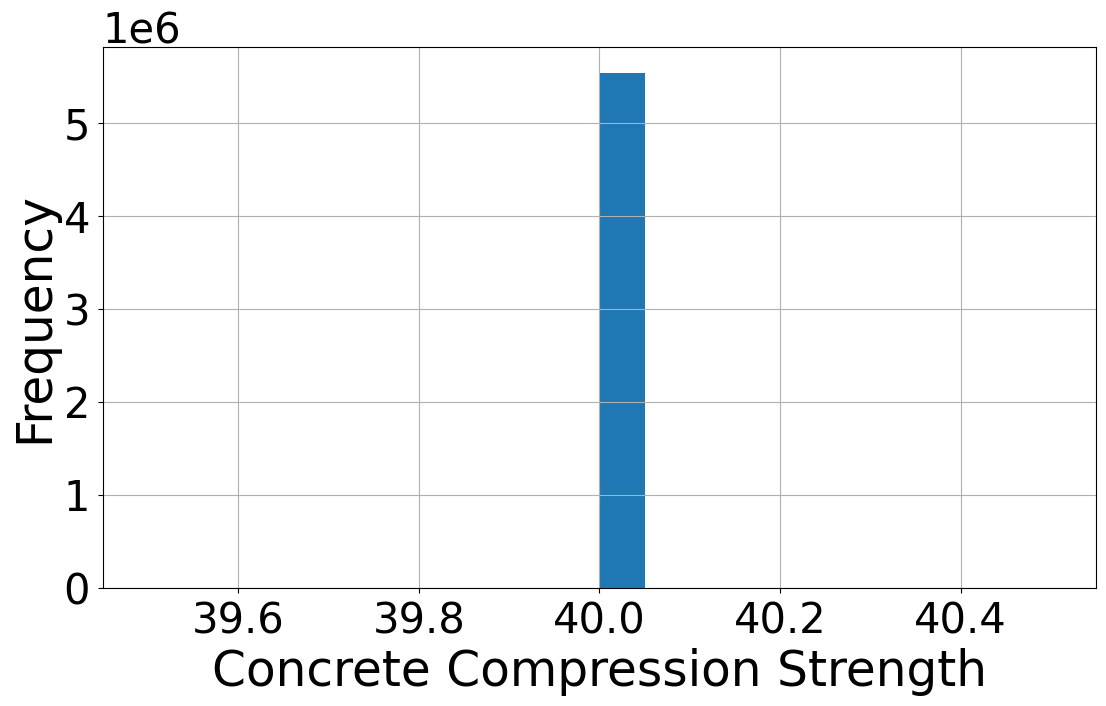

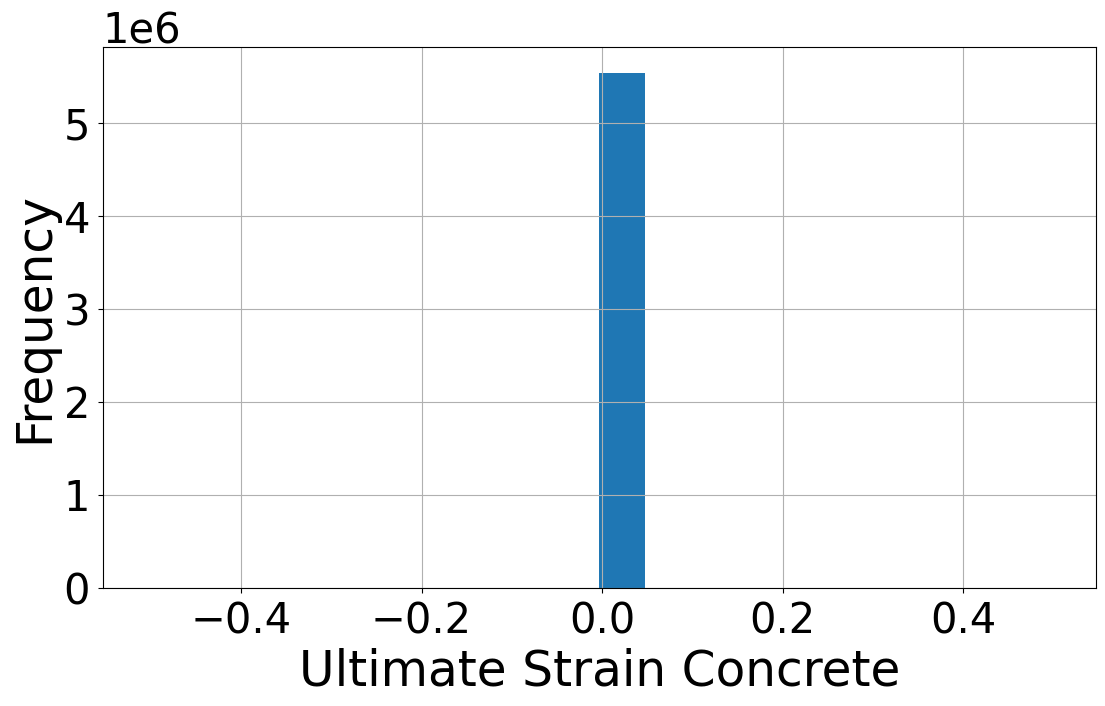

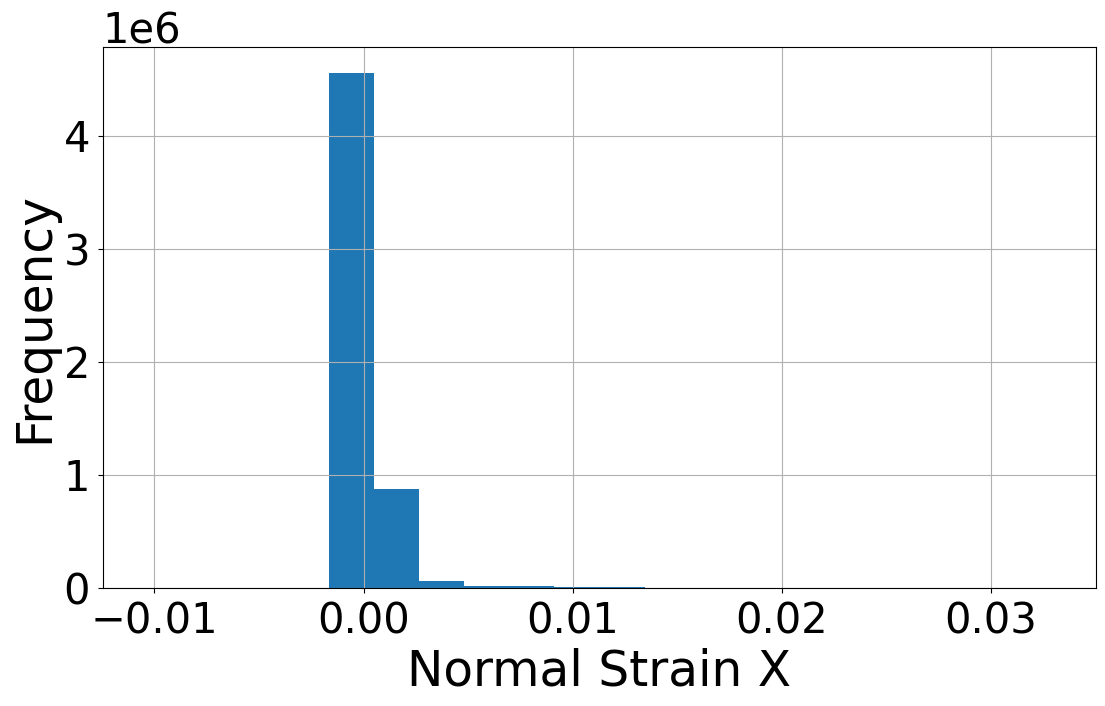

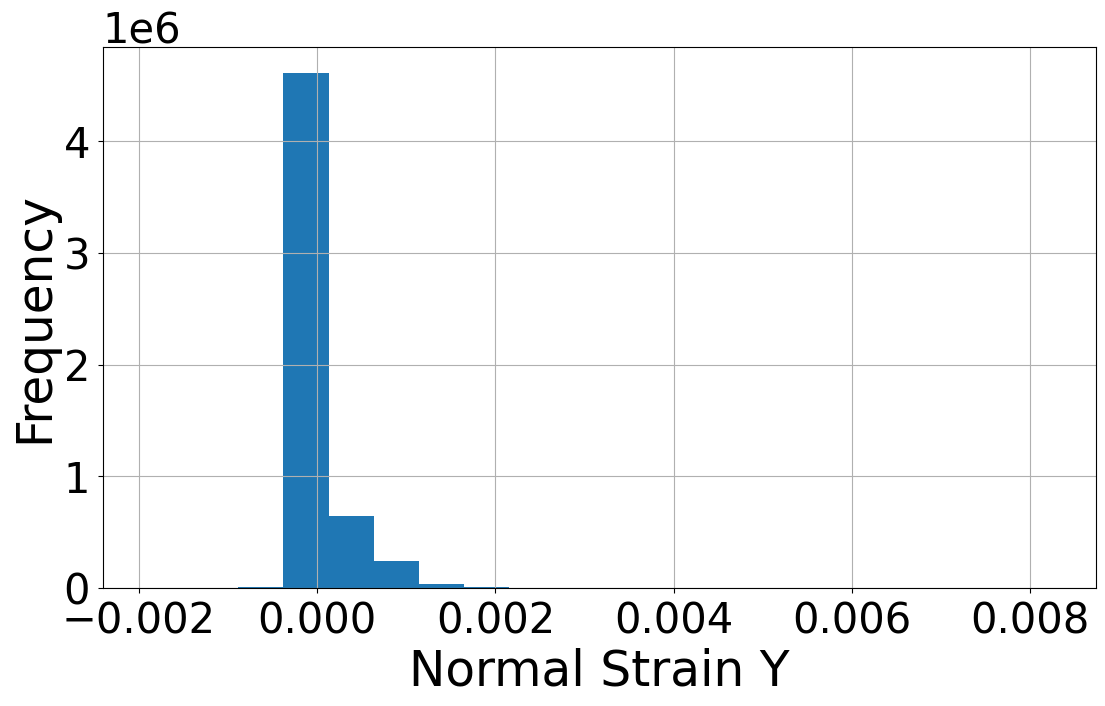

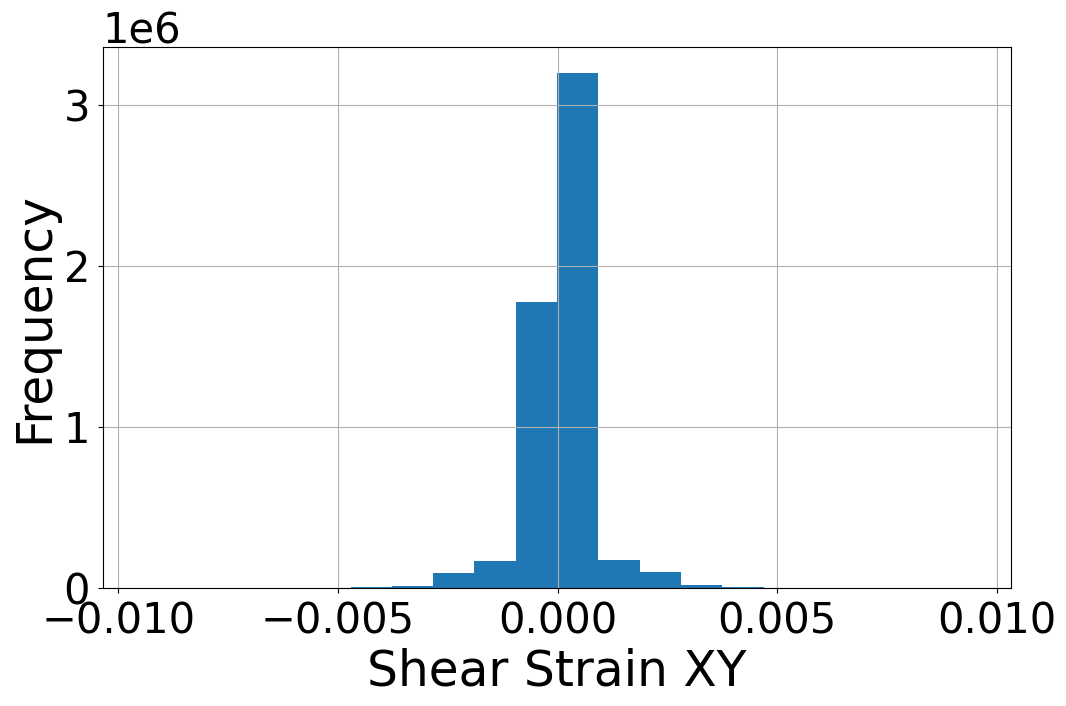

In [12]:
for i in range(len(IN_VAR_NAMES)):
    name = IN_VAR_NAMES[i]
    plt.rc('font', size=38) #controls default text size
    plt.rc('axes', labelsize=35)
    plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
    plt.figure(figsize=(12, 8), dpi=100)
    plt.hist(X_train[:, i], bins=20)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig("stats/"+name+'_hist_train.png', dpi=100)
    plt.grid()
    plt.show()

## Create histograms for output variables

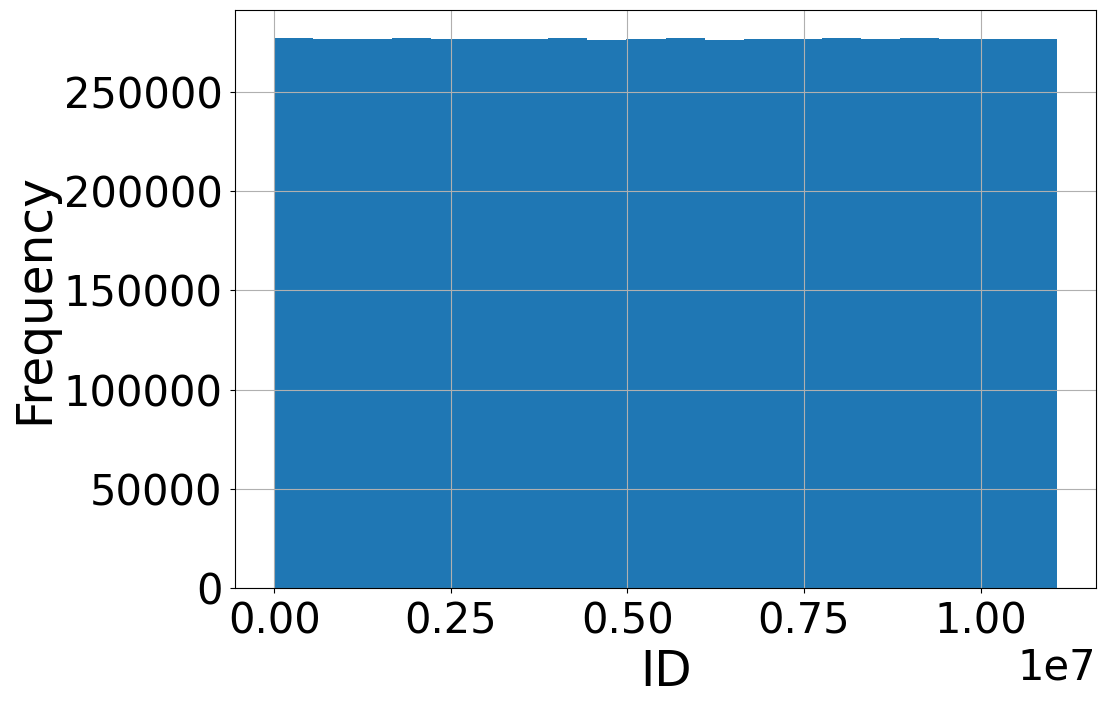

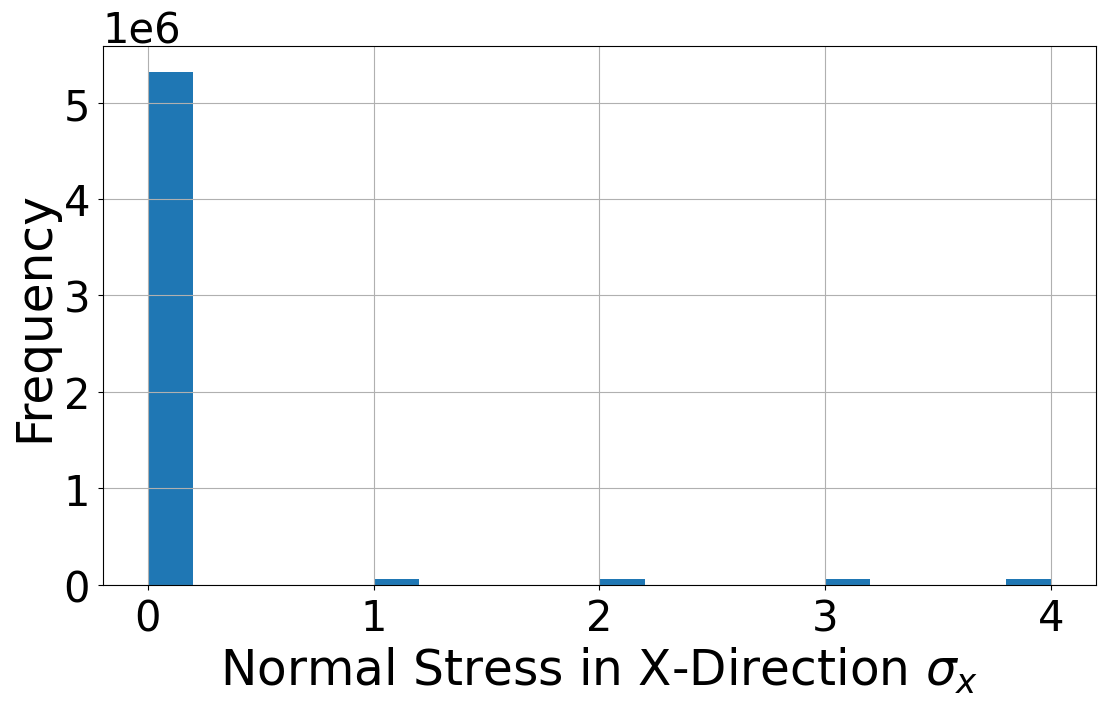

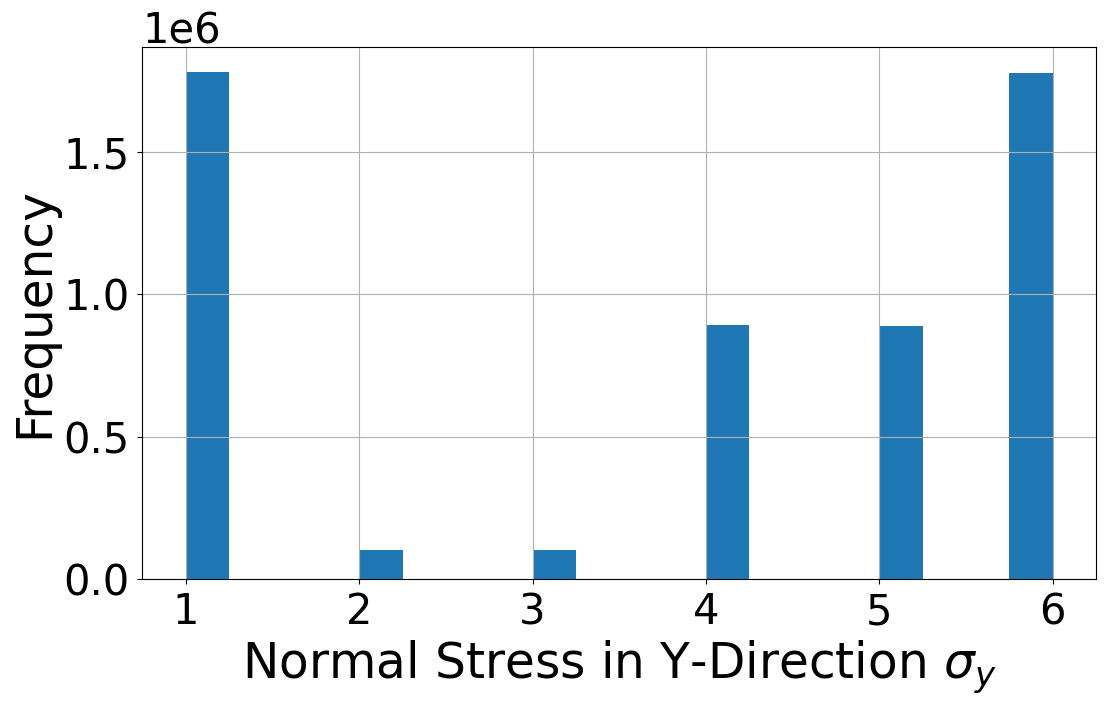

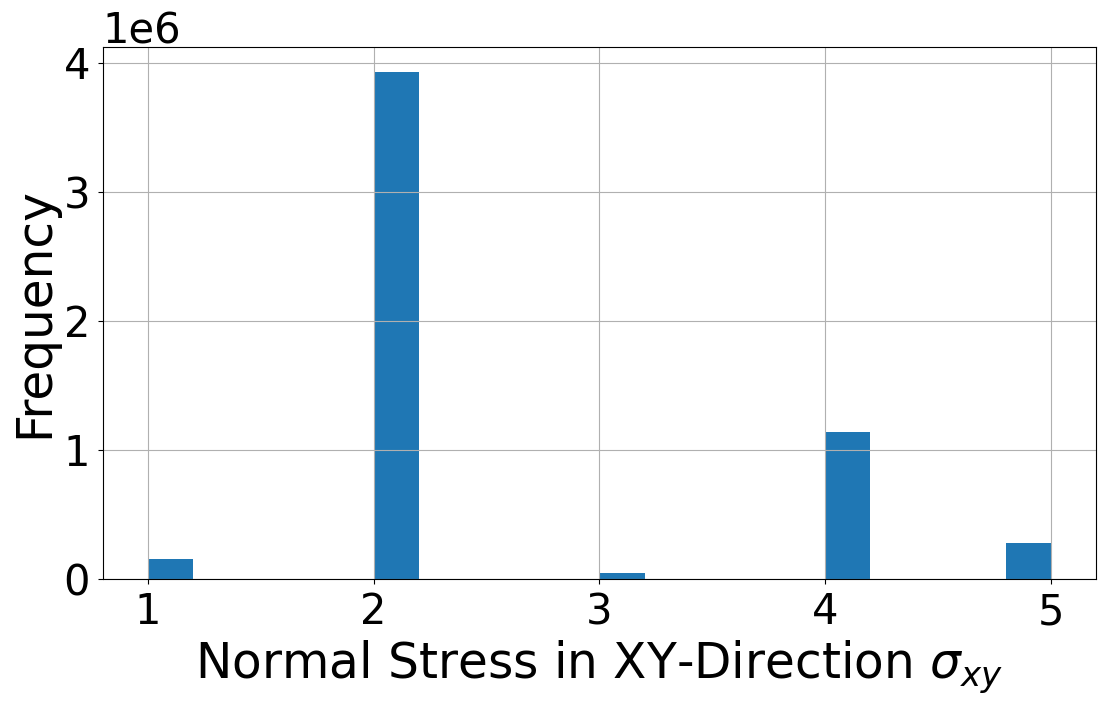

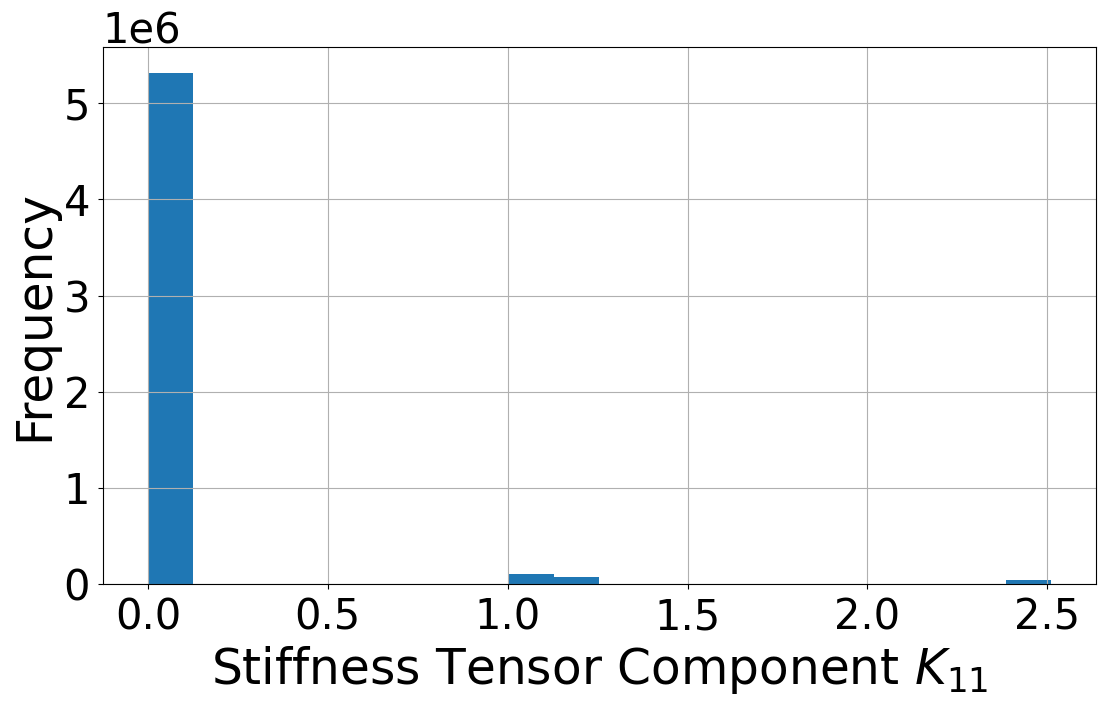

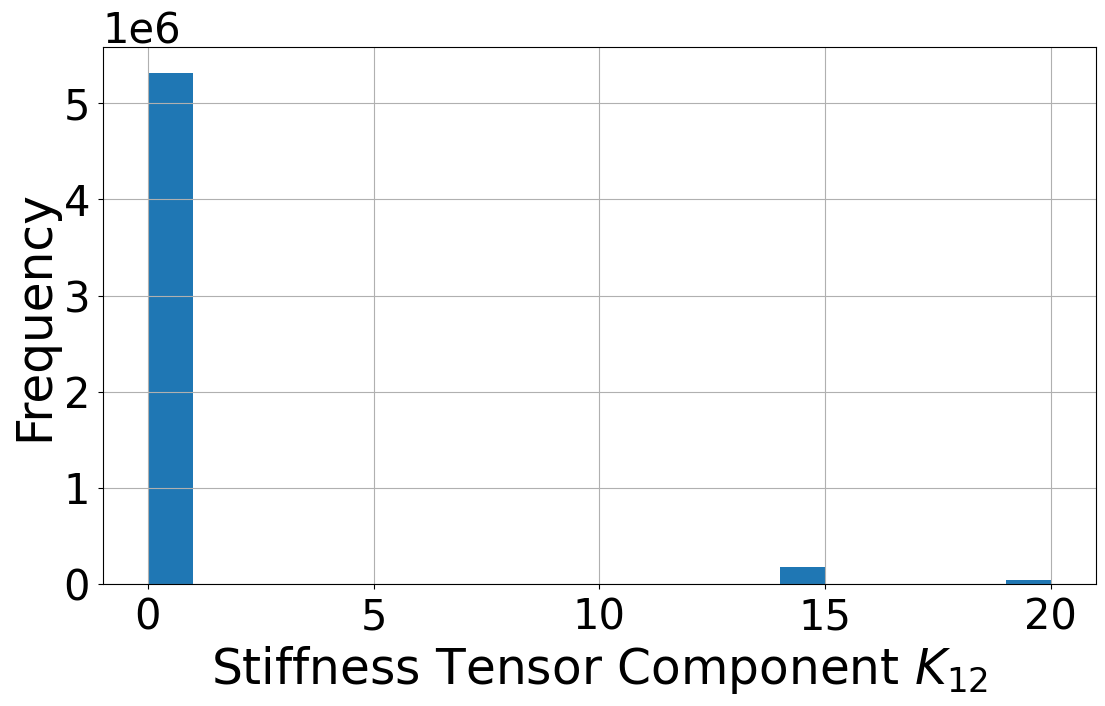

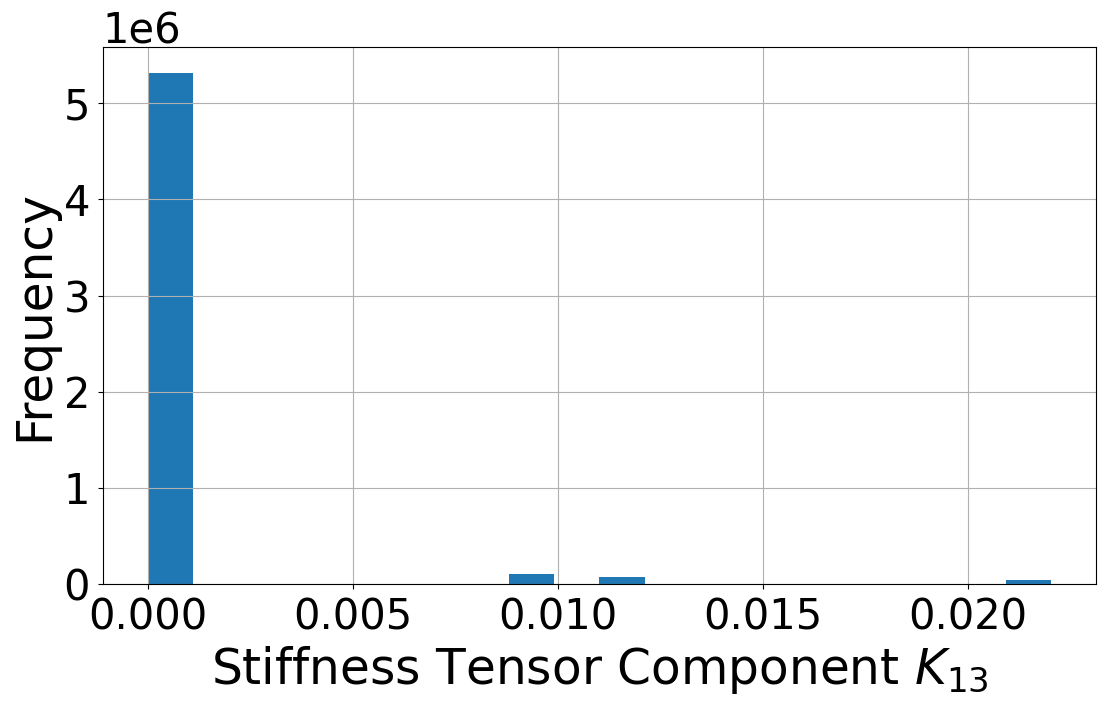

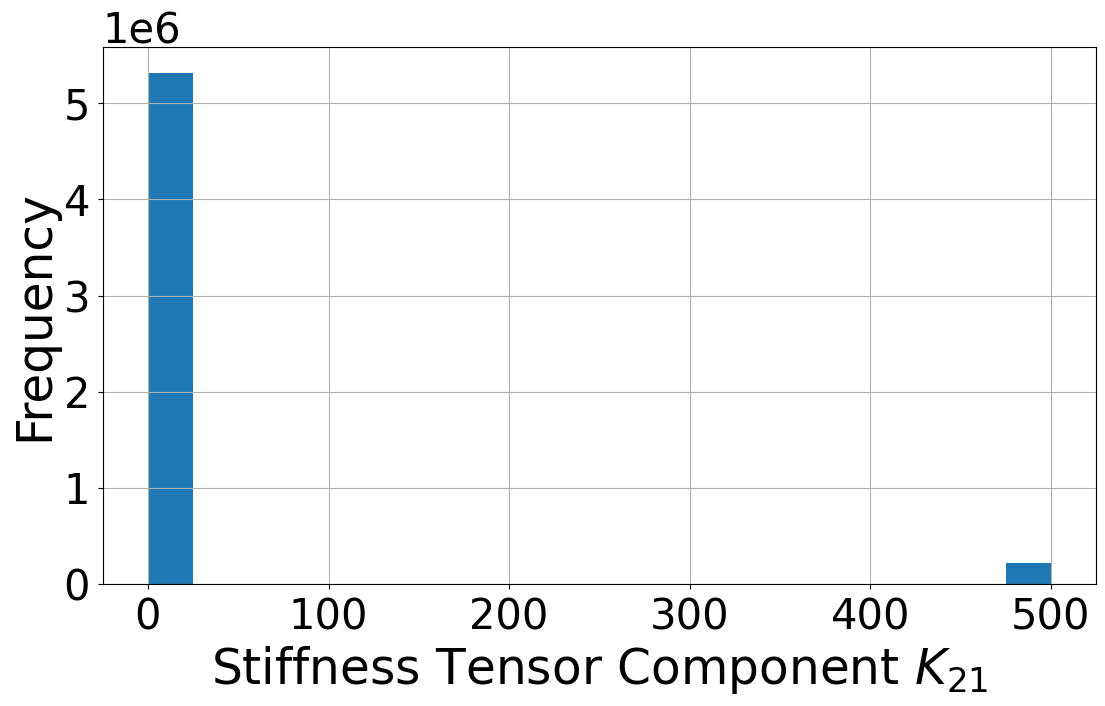

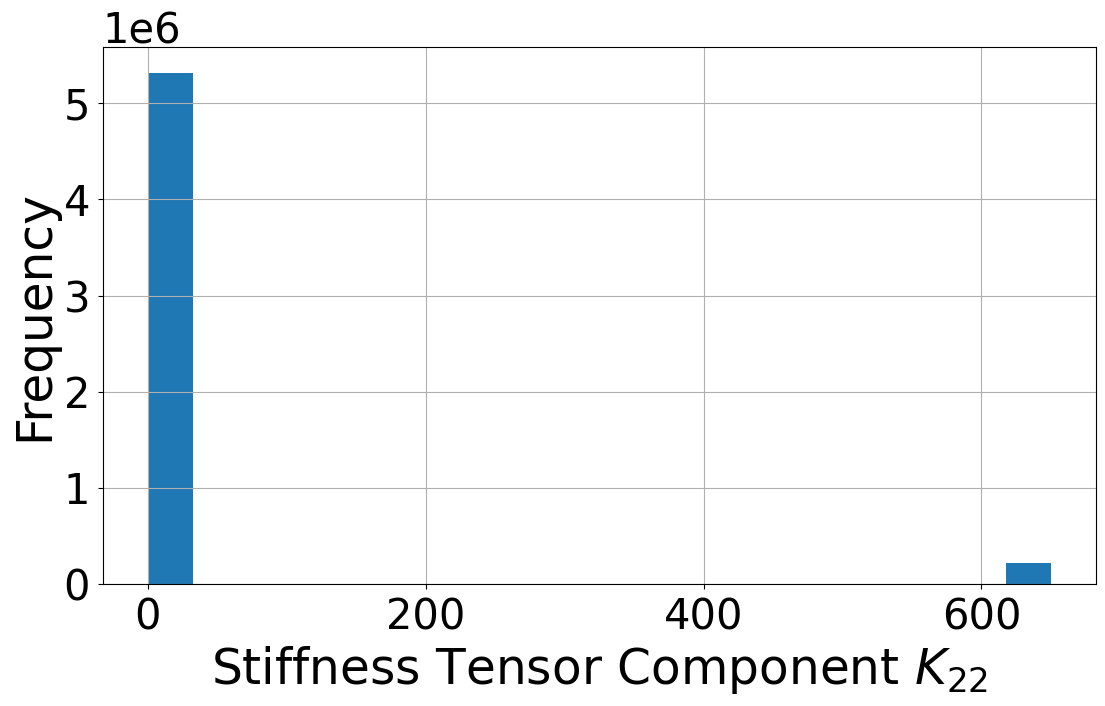

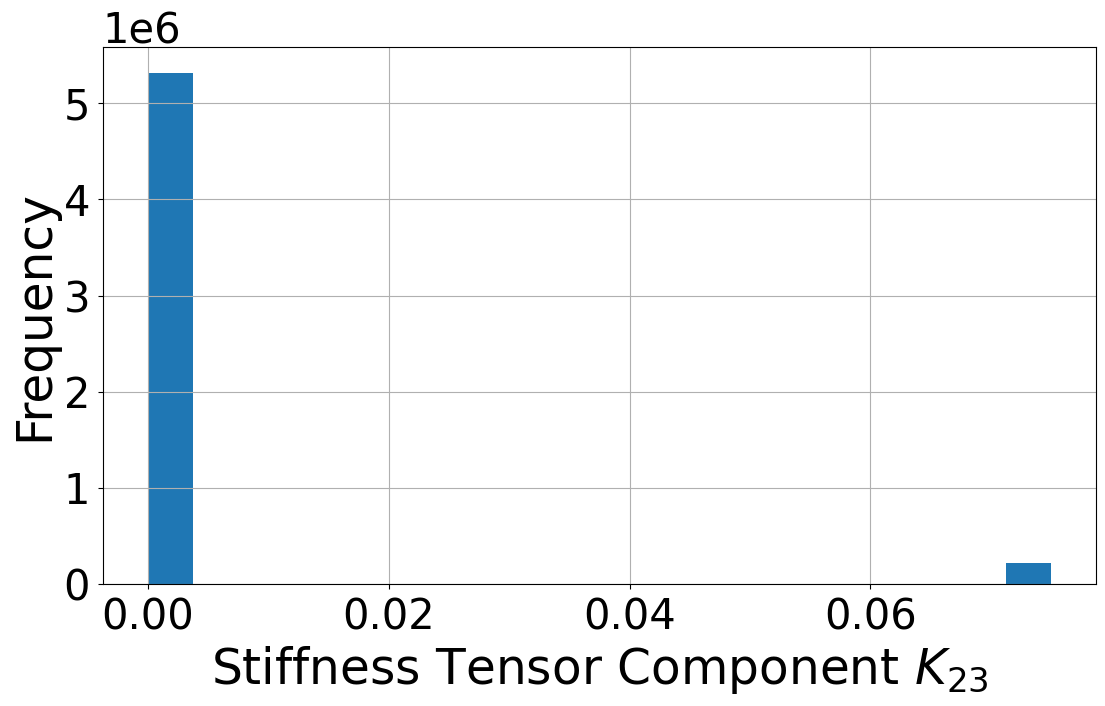

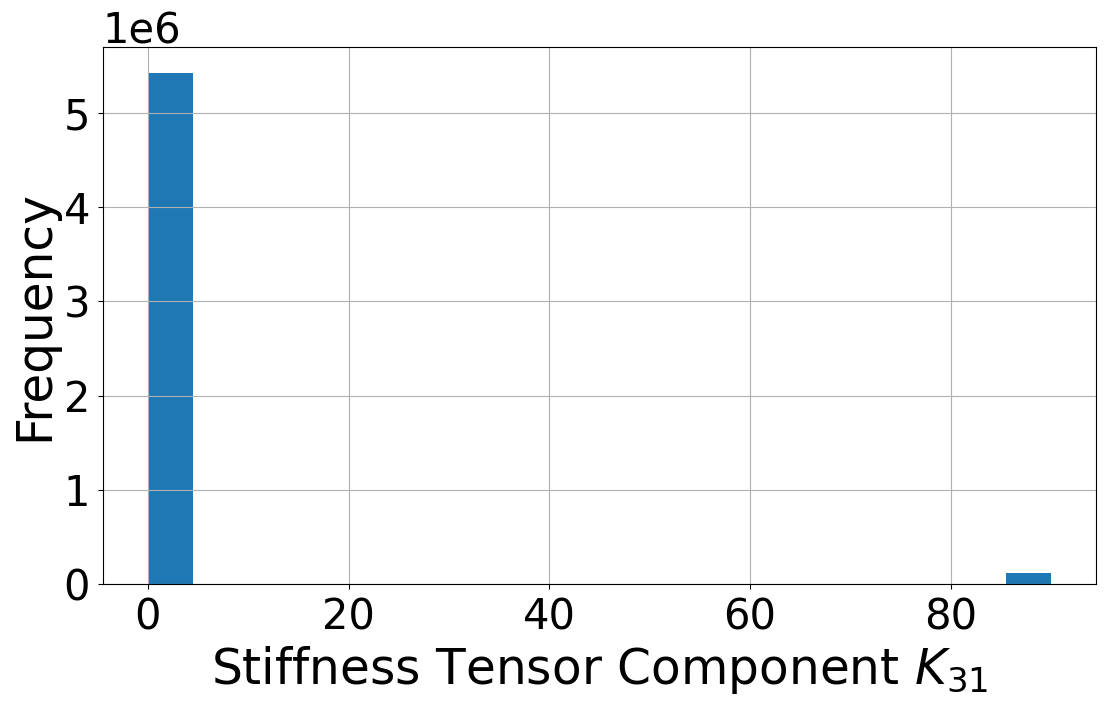

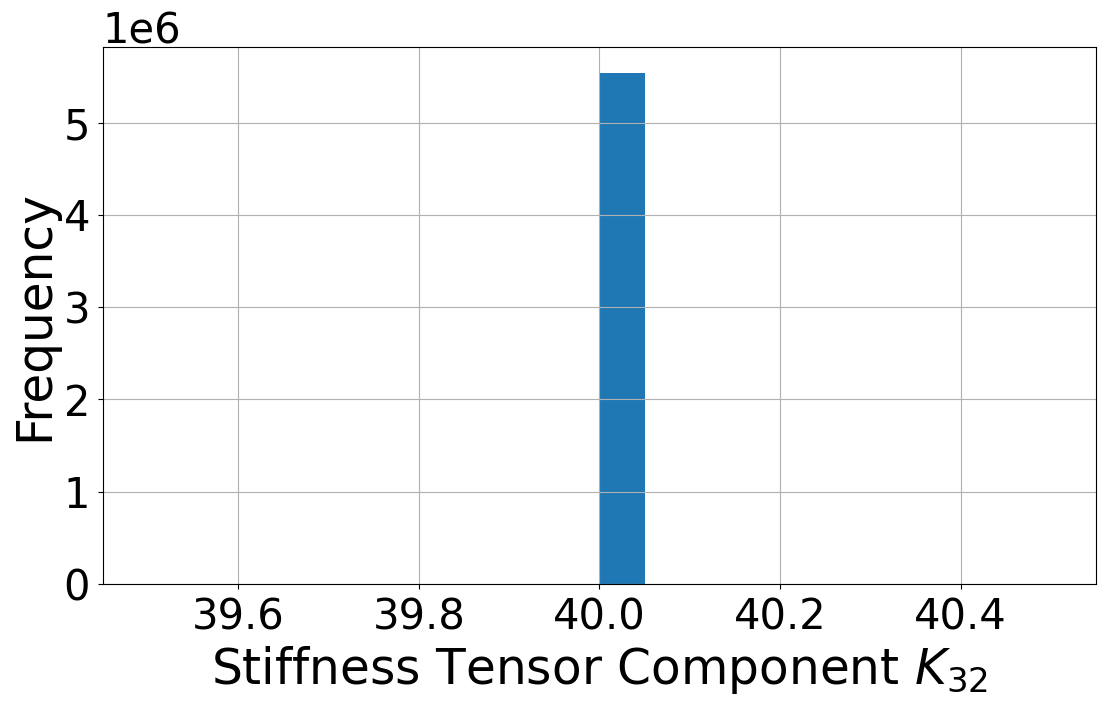

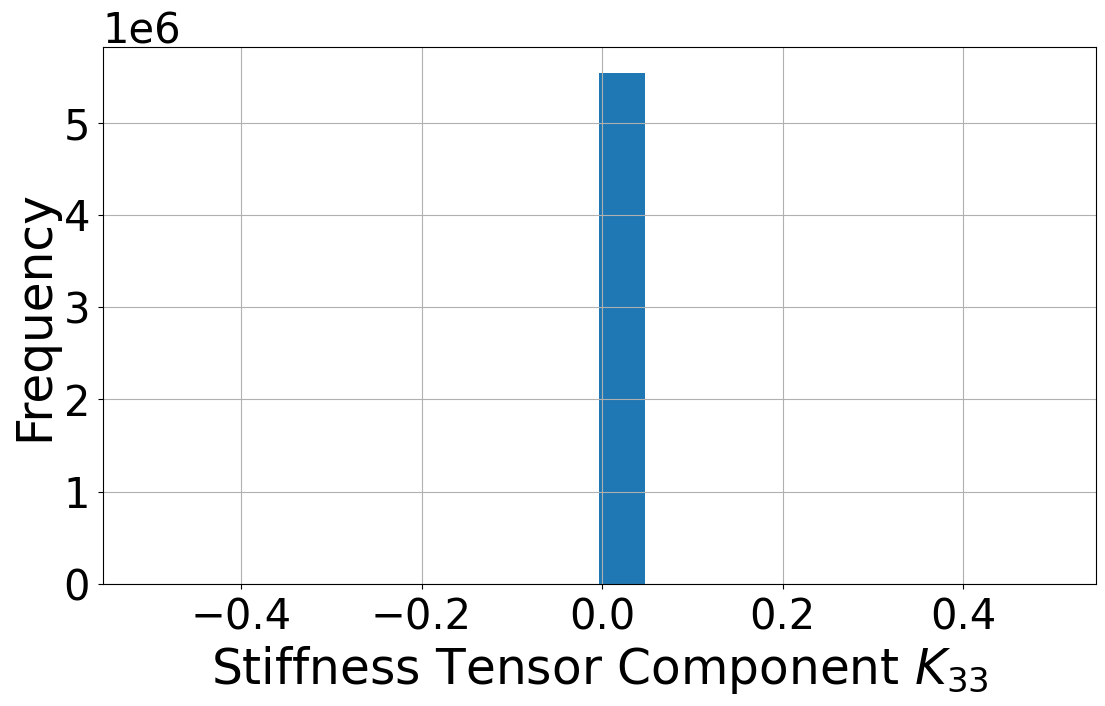

In [13]:
for i in range(len(OUT_VAR_NAMES)):
    name = OUT_VAR_NAMES[i]
    plt.rc('font', size=38) #controls default text size
    plt.rc('axes', labelsize=35)
    plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
    plt.figure(figsize=(12, 8),dpi=100)
    plt.hist(X_train[:, i], bins=20)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig("stats/"+name+'_hist_train.png', dpi=100)
    plt.grid()
    plt.show()

## PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
def standardize(X:np.array, X_ref:np.array) -> np.array:
    return (X - X_ref.mean(axis=0)) / (X_ref.std(axis=0) + (X_ref.std(axis=0)==0).astype(int))

In [16]:
X_train_std, X_val_std, X_test_std = standardize(X_train, X_train), standardize(X_val, X_train), standardize(X_test, X_train)
y_train_std, y_val_std, y_test_std = standardize(y_train, y_train), standardize(y_val, y_train), standardize(y_test, y_train)

In [21]:
pca = PCA(2)
X_pca = pca.fit_transform(X_train_std[:100000, 1:])
y_pca = pca.fit_transform(y_train_std[:100000, 1:])

In [34]:
def values_to_color(X):
    return (X - X.min()) / (X - X.min()).max()

Plot the two principal components and at the same time, use the first component as red pixel value and the second component as blue pixel value.

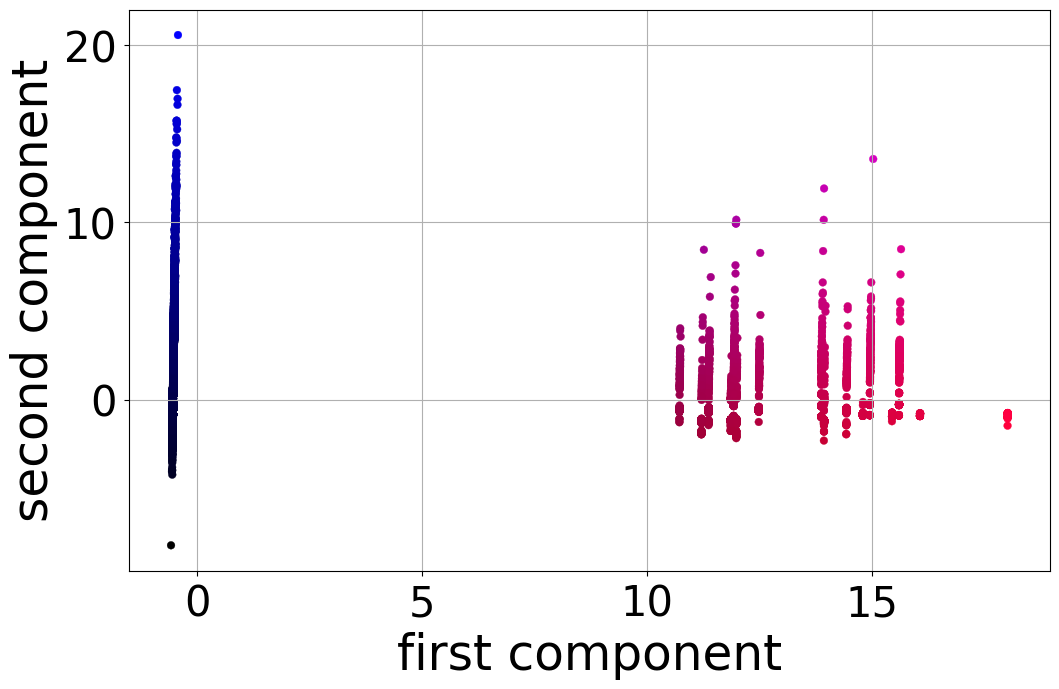

In [51]:
colors = np.hstack([values_to_color(X_pca[:, :1]), np.zeros_like(X_pca[:, :1]), values_to_color(X_pca[:, 1:2]), np.ones_like(X_pca[:, :1])])
plt.figure(figsize=(12, 8), dpi=100)
plt.rc('axes', labelsize=35)
plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
plt.rc('legend', fontsize=30) #fontsize of the legend
plt.xlabel('first component')
plt.ylabel("second component")
plt.tight_layout()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.grid()
plt.show()

Plot two principal components of output, but keep coloring of input (computed previously). This shows, where the points from the inputs are mapped to in the output.

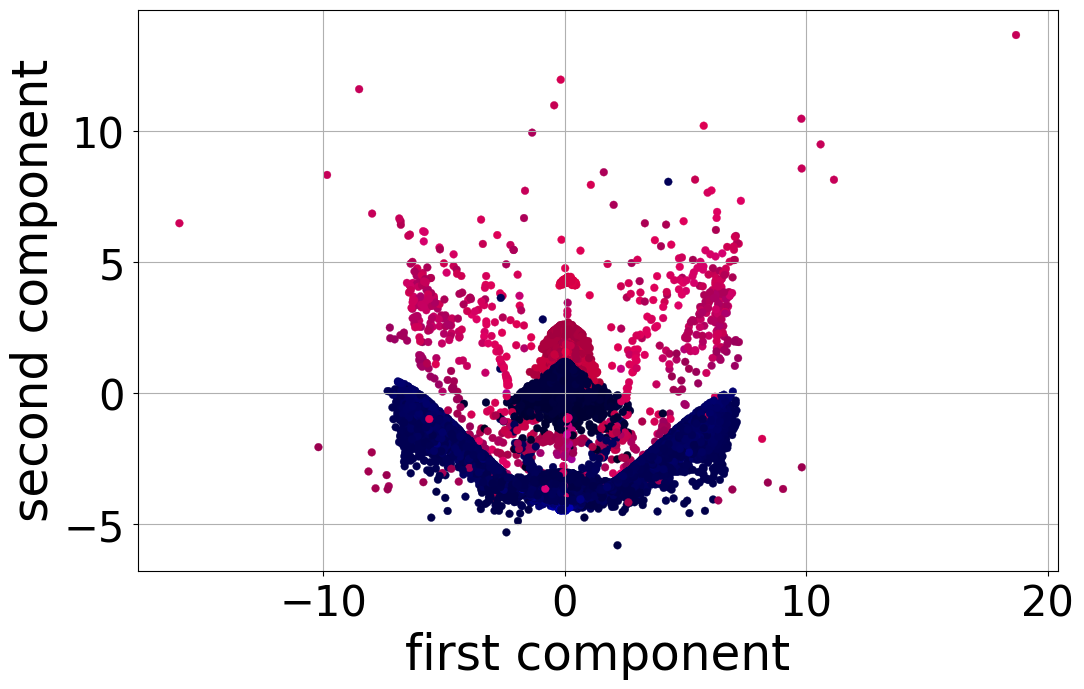

In [50]:
plt.figure(figsize=(12, 8), dpi=100)
plt.rc('axes', labelsize=35)
plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
plt.rc('legend', fontsize=30) #fontsize of the legend
plt.xlabel('first component')
plt.ylabel("second component")
plt.tight_layout()
plt.scatter(y_pca[:, 0], y_pca[:, 1], c=colors)
plt.grid()
plt.show()

Now color the points according to Reinforcement Layer.

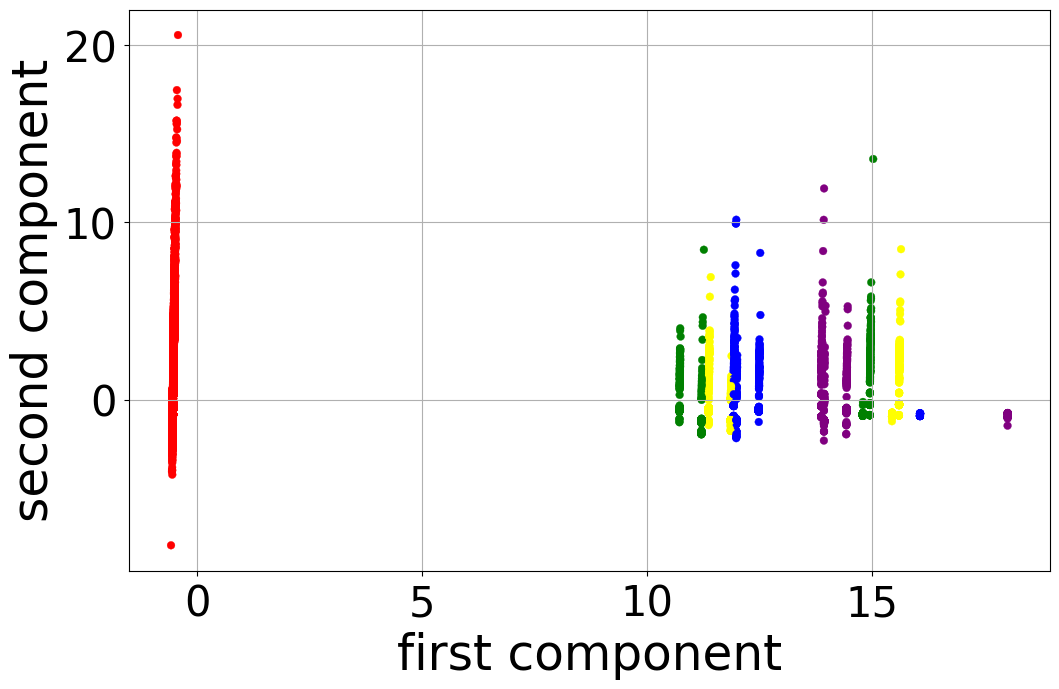

In [53]:
colors = np.array(["red", "blue", "green", "yellow", "purple", "pink", "grey"])[X_train[:100000, 1].astype(int)]
plt.figure(figsize=(12, 8), dpi=100)
plt.rc('axes', labelsize=35)
plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
plt.rc('legend', fontsize=30) #fontsize of the legend
plt.xlabel('first component')
plt.ylabel("second component")
plt.tight_layout()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.grid()
plt.show()

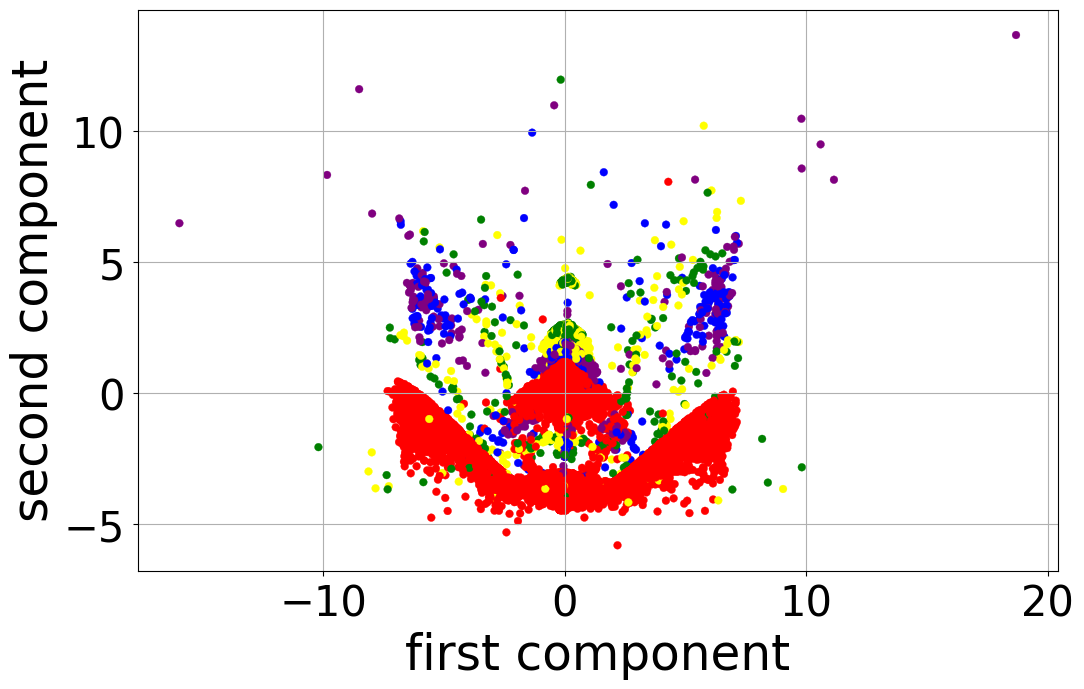

In [54]:
colors = np.array(["red", "blue", "green", "yellow", "purple", "pink", "grey"])[X_train[:100000, 1].astype(int)]
plt.figure(figsize=(12, 8), dpi=100)
plt.rc('axes', labelsize=35)
plt.rc('xtick', labelsize=30) #fontsize of the x tick labels
plt.rc('ytick', labelsize=30) #fontsize of the y tick labels
plt.rc('legend', fontsize=30) #fontsize of the legend
plt.xlabel('first component')
plt.ylabel("second component")
plt.tight_layout()
plt.scatter(y_pca[:, 0], y_pca[:, 1], c=colors)
plt.grid()
plt.show()